# Algorithm 5 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

1016 patches created with algorithm 5 loaded.
[25871.19345296 12573.4373126  12313.11434682 10047.60266385
  8789.19388827  8150.09852425  7501.40111523  7277.49182632
  6213.50248815  5275.63573176  5109.60148946  4703.86261998
  4616.78574407  4455.23964702  3863.05957583  3649.68218232
  3568.34980944  3328.13699811  3175.24979888  2997.27959718
  2953.45925608  2717.44783564  2490.55919848  2446.72642953
  2310.06139261  2285.01176394  2174.05375827  1897.30535209
  1878.76666124  1767.62175176  1734.94885509  1564.96949616
  1552.59731017  1432.51290474  1361.51901321  1265.41151325
  1172.07848667  1164.05150714  1142.53152304  1112.34373383
  1075.24820758  1000.48574618   993.79835809   958.26567067
   907.44467472   872.1244216    860.97278286   841.95596077
   818.1540846    785.5289162    756.85360078   725.12321284
   686.42130994   669.90730405   659.26231561   611.52668779
   576.80928053   575.04014588   562.36517286   542.62371631
   540.75469182   526.86605174   521.64

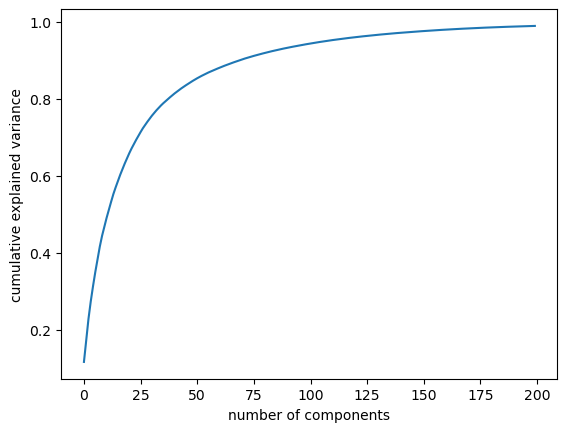

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra5.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav5.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 5 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)
# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
np.savetxt('mean5.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale5.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
os.chdir('..')
os.chdir('./models/')

with open('pca5.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)